In [154]:
import pandas as pd

# COVID-19

In [169]:
# Total cases

In [170]:
    # World regions
world_ts = pd.read_csv('output_data/time_series/ts-world-covid19.csv')
world_ts['Date_Confirmed'] = pd.DatetimeIndex(world_ts['Date_Confirmed'])
world_ts = world_ts[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US','Mexico']]

    # Mexico regions
mexico_ts = pd.read_csv('output_data/time_series/ts-mexico-covid19.csv')
mexico_ts['Date_Confirmed'] = pd.DatetimeIndex(mexico_ts['Date_Confirmed'])
mexico_ts['Mexico_SS'] = mexico_ts.sum(axis=1) # Sum rows for Mexico total (to indicate: Secretaría de Salud)

In [171]:
# Daily cases

In [172]:
    # World regions
world_daily = pd.read_csv('output_data/time_series/daily-world_covid19.csv')
world_daily['Date_Confirmed'] = pd.DatetimeIndex(world_daily['Date_Confirmed'])
world_daily = world_daily[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US','Mexico']]

    # Mexico regions
mexico_daily = pd.read_csv('output_data/time_series/daily-mexico-covid19.csv')
mexico_daily['Date_Confirmed'] = pd.DatetimeIndex(mexico_daily['Date_Confirmed'])
mexico_daily['Mexico_SS'] = mexico_daily.sum(axis=1) # Sum rows for Mexico total (to indicate: Secretaría de Salud)

In [179]:
# Filter time series

In [176]:
import janitor

In [177]:
world_ts = world_ts.filter_date('Date_Confirmed','2020-02-15','2020-04-18')
mexico_ts = mexico_ts.filter_date('Date_Confirmed','2020-02-15','2020-04-18')
world_daily = world_daily.filter_date('Date_Confirmed','2020-02-15','2020-04-18')
mexico_daily = mexico_daily.filter_date('Date_Confirmed','2020-02-15','2020-04-18')

In [ ]:
# Merge world and Mexico data

In [165]:
    # Total
ts_totals = world_ts.merge(mexico_ts, on='Date_Confirmed', how='outer')
ts_totals = ts_totals.fillna(method='ffill') # First fill missing time series totals with previous row value
ts_totals = ts_totals.replace(0, np.nan) # Now convert 0 to NaN

    # Daily
ts_daily = world_daily.merge(mexico_daily, on='Date_Confirmed', how='outer')

In [161]:
# Save

In [162]:
ts_totals.to_csv('output_data/time_series/totals.csv', index=False)
ts_daily.to_csv('output_data/time_series/daily.csv', index=False)

In [166]:
# Make sure datetimes are correct

In [153]:
ts_totals['Date_Confirmed'] = pd.to_datetime(ts_totals.Date_Confirmed, format='%d-%m-%Y')
ts_totals['Date_Confirmed'] = ts_totals['Date_Confirmed'].dt.strftime('%d-%m-%Y')
ts_totals = ts_totals.set_index(pd.DatetimeIndex(ts_totals['Date_Confirmed']))
ts_totals.index = ts_totals.index.strftime('%d-%m-%Y')

ts_daily['Date_Confirmed'] = pd.to_datetime(ts_daily.Date_Confirmed, format='%d-%m-%Y')
ts_daily['Date_Confirmed'] = ts_daily['Date_Confirmed'].dt.strftime('%d-%m-%Y')
ts_daily = ts_daily.set_index(pd.DatetimeIndex(ts_daily['Date_Confirmed']))
ts_daily.index = ts_daily.index.strftime('%d-%m-%Y')

### Un-pivot test

In [145]:
tbl_total = pd.DataFrame(ts_totals.set_index(['Date_Confirmed']).rename_axis(['Region'], axis=1).stack())

In [146]:
tbl_daily = pd.DataFrame(ts_daily.set_index(['Date_Confirmed']).rename_axis(['Region'], axis=1).stack())

In [147]:
tbl = pd.merge(tbl_total, tbl_daily, how='inner', on=['Date_Confirmed', 'Region'])

In [148]:
tbl = tbl.rename(columns={'0_x': 'total', '0_y': 'daily'})

In [150]:
tbl.tail()

total  daily
Date_Confirmed Region                  
18-04-2020     TLAXCALA     70.0   10.0
               VERACRUZ     68.0    9.0
               YUCATAN     213.0   13.0
               ZACATECAS    28.0    5.0
               Mexico_SS  6371.0  622.0

In [151]:
# Right format for plotly (long, instead of wide)
# https://plotly.com/python/animations/#using-a-slider-and-buttons
# https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv
plot_data = (tbl.reset_index()).to_csv('output_data/time_series/ts-long.csv', index=False)

# Plots

### Growth rate

In [45]:
from numpy import *
import math
import matplotlib.pyplot as plt

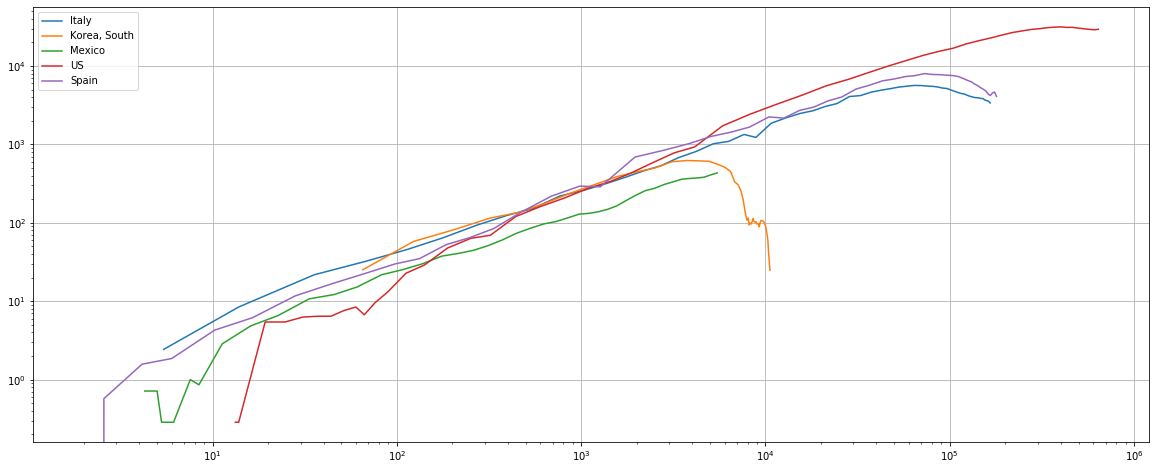

In [15]:
plt.figure(figsize=(20,8))

for region in ['Italy','Korea, South','Mexico','US','Spain']:
    plt.plot(list(ts_totals[region].rolling(window=7).mean()), list(ts_daily[region].rolling(window=7).mean()), label=region)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

#### World + Mexico states

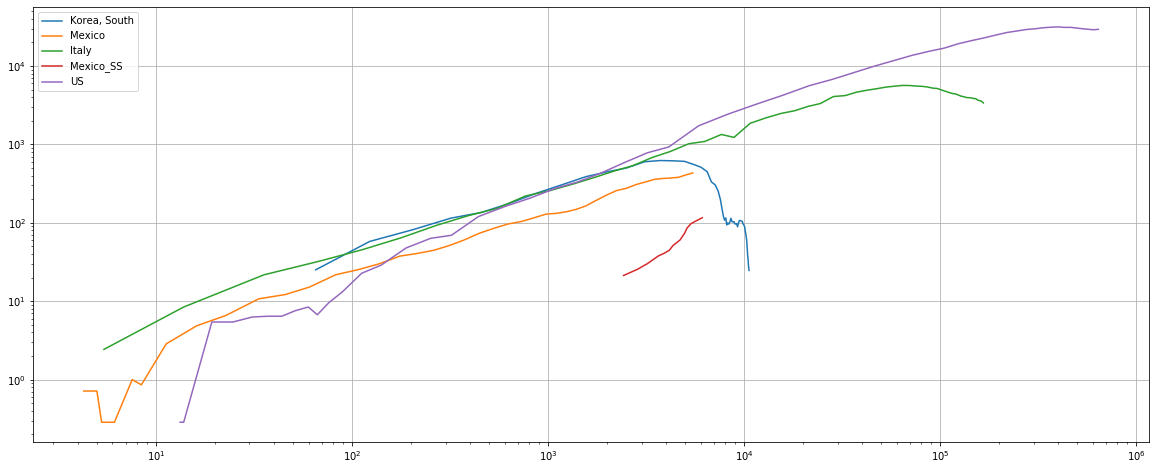

In [16]:
plt.figure(figsize=(20,8))

for state in ['Korea, South','Mexico','Italy','Mexico_SS','US']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

#### Mexico states

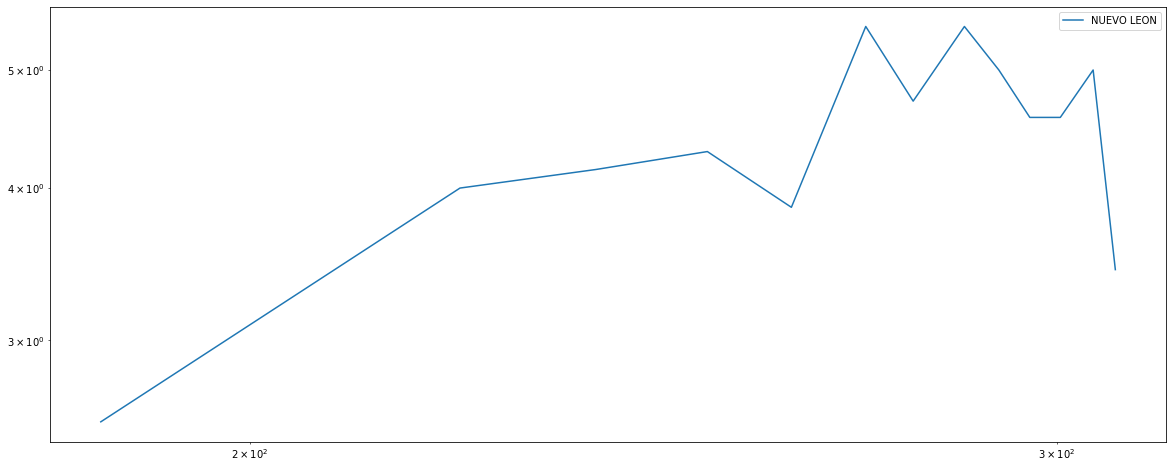

In [22]:
plt.figure(figsize=(20,8))

for state in ['NUEVO LEON']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()